In [1]:
import numpy as np
import pandas as pd
import scipy.sparse as sp
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import _pickle as cPickel
import xgboost

In [2]:
N_FEATURES = 47236
N_TRAIN = 20242
N_TEST = 677399

In [3]:
# %%time

# fname = '/home/shikhar/scikit_learn_data/rcv1_train.binary'

# y_train = np.zeros((N_TRAIN, 1), np.int8)
# x_train = sp.lil_matrix((N_TRAIN, N_FEATURES+1))

# index = 0;
# with open(fname, 'r') as ins:
#     for line in ins:
#         line = line[:-1]
#         line_components = line.split(' ')
#         for comp in line_components[1:]:
#             ind_val = comp.split(':')
#             ind = int(ind_val[0])
#             val = float(ind_val[1])
#             x_train[index, ind-1] = val
#         x_train[index, N_FEATURES] = 1
#         y_train[index] = int(line_components[0])
#         index += 1
        
# x_train = sp.csr_matrix(x_train)

In [4]:
# f = open('/home/shikhar/scikit_learn_data/processed_rcv1_binary_x_train', 'wb')
# cPickel.dump(x_train, f)
# f.close()

# f = open('/home/shikhar/scikit_learn_data/processed_rcv1_binary_y_train', 'wb')
# cPickel.dump(y_train, f)
# f.close()

In [5]:
# fname = '/home/shikhar/scikit_learn_data/rcv1_test.binary'

# y_test = np.zeros((N_TEST, 1), np.int8)
# x_test = sp.lil_matrix((N_TEST, N_FEATURES+1))

# index = 0;
# with open(fname, 'r') as ins:
#     for line in ins:
#         line = line[:-1]
#         line_components = line.split(' ')
#         for comp in line_components[1:]:
#             ind_val = comp.split(':')
#             ind = int(ind_val[0])
#             val = float(ind_val[1])
#             x_test[index, ind-1] = val
#         x_test[index, N_FEATURES] = 1
#         y_test[index] = int(line_components[0])
#         index += 1

# x_test = sp.csr_matrix(x_test)

In [6]:
# f = open('/home/shikhar/scikit_learn_data/processed_rcv1_binary_x_test', 'wb')
# cPickel.dump(x_test, f)
# f.close()

# f = open('/home/shikhar/scikit_learn_data/processed_rcv1_binary_y_test', 'wb')
# cPickel.dump(y_test, f)
# f.close()

### Load presaved data

In [8]:
%%time
f = open('/home/shikhar/scikit_learn_data/rcv1_binary_x_train',  'rb')
x_train = cPickel.load(f)
f.close()
x_train = sp.csr_matrix(x_train)

f = open('/home/shikhar/scikit_learn_data/rcv1_binary_y_train',  'rb')
y_train = cPickel.load(f)
f.close()
y_train = np.int8(y_train)

f = open('/home/shikhar/scikit_learn_data/rcv1_binary_x_test',  'rb')
x_test = cPickel.load(f)
f.close()
x_test = sp.csr_matrix(x_test)

f = open('/home/shikhar/scikit_learn_data/rcv1_binary_y_test',  'rb')
y_test = cPickel.load(f)
f.close()
y_test = np.int8(y_test)


CPU times: user 264 ms, sys: 1.71 s, total: 1.97 s
Wall time: 10.3 s


### Training Binary MIRA

In [12]:
w = np.random.rand(N_FEATURES+1, 1)
max_iter = 50;
train_acc = []
test_acc = []


for k in range(max_iter):
    for i in range(N_TRAIN):
        x = x_train[i,:].todense()
        w_x =  x * w 
        y_hat = np.sign(w_x)

        prod = - (y_train[i] * w_x) / (x * x.T)
        tau = min( max(prod, 0) , 1)
        upt = tau * int(y_train[i]) * x
        w += upt.T
    
    crct = 0;
    for i in range(N_TRAIN):
        x = x_train[i,:].todense()
        y_hat = np.sign( x * w )

        if(y_hat == y_train[i]):
            crct += 1
            
    train_acc.append((N_TRAIN - crct)/N_TRAIN * 100)
    
    crct = 0;
    for i in range(N_TEST):
        x = x_test[i,:].todense()
        y_hat = np.sign( x * w )

        if(y_hat == y_test[i]):
            crct += 1
    
    test_acc.append((N_TEST - crct)/N_TEST * 100)
    
    print('Epoch', k, train_acc, test_acc)

Epoch 0 [11.49095939136449] [14.65605942730946]
Epoch 1 [11.49095939136449, 7.598063432467147] [14.65605942730946, 11.55950924049194]
Epoch 2 [11.49095939136449, 7.598063432467147, 6.130817112933505] [14.65605942730946, 11.55950924049194, 10.797329195939174]
Epoch 3 [11.49095939136449, 7.598063432467147, 6.130817112933505, 5.167473569805355] [14.65605942730946, 11.55950924049194, 10.797329195939174, 10.21997375254466]
Epoch 4 [11.49095939136449, 7.598063432467147, 6.130817112933505, 5.167473569805355, 4.535124987649441] [14.65605942730946, 11.55950924049194, 10.797329195939174, 10.21997375254466, 9.895054465684183]
Epoch 5 [11.49095939136449, 7.598063432467147, 6.130817112933505, 5.167473569805355, 4.535124987649441, 4.1744886868886475] [14.65605942730946, 11.55950924049194, 10.797329195939174, 10.21997375254466, 9.895054465684183, 9.705505913058627]
Epoch 6 [11.49095939136449, 7.598063432467147, 6.130817112933505, 5.167473569805355, 4.535124987649441, 4.1744886868886475, 3.80891216282

Epoch 20 [11.49095939136449, 7.598063432467147, 6.130817112933505, 5.167473569805355, 4.535124987649441, 4.1744886868886475, 3.8089121628297598, 3.507558541646082, 3.280308269933801, 3.141982017587195, 3.092579784606264, 2.9097915225768203, 2.7023021440569113, 2.66772058097026, 2.6183183479893293, 2.484932318940816, 2.4256496393636993, 2.3713071830846753, 2.3021440569113727, 2.242861377334256, 2.2082798142476037] [14.65605942730946, 11.55950924049194, 10.797329195939174, 10.21997375254466, 9.895054465684183, 9.705505913058627, 9.60718867314537, 9.540610482153058, 9.516252607399775, 9.549763138120959, 9.578697340858195, 9.508428562782054, 9.434616821105433, 9.386196318565572, 9.364348043029294, 9.33954729782595, 9.320356244990027, 9.299393710353868, 9.293784017986445, 9.281678892351481, 9.26573555614933]
Epoch 21 [11.49095939136449, 7.598063432467147, 6.130817112933505, 5.167473569805355, 4.535124987649441, 4.1744886868886475, 3.8089121628297598, 3.507558541646082, 3.280308269933801, 3.

Epoch 29 [11.49095939136449, 7.598063432467147, 6.130817112933505, 5.167473569805355, 4.535124987649441, 4.1744886868886475, 3.8089121628297598, 3.507558541646082, 3.280308269933801, 3.141982017587195, 3.092579784606264, 2.9097915225768203, 2.7023021440569113, 2.66772058097026, 2.6183183479893293, 2.484932318940816, 2.4256496393636993, 2.3713071830846753, 2.3021440569113727, 2.242861377334256, 2.2082798142476037, 2.1736982511609524, 2.1736982511609524, 2.1736982511609524, 2.1736982511609524, 2.124296018180022, 2.144056911372394, 2.144056911372394, 2.1539373579685805, 2.1786384744590452] [14.65605942730946, 11.55950924049194, 10.797329195939174, 10.21997375254466, 9.895054465684183, 9.705505913058627, 9.60718867314537, 9.540610482153058, 9.516252607399775, 9.549763138120959, 9.578697340858195, 9.508428562782054, 9.434616821105433, 9.386196318565572, 9.364348043029294, 9.33954729782595, 9.320356244990027, 9.299393710353868, 9.293784017986445, 9.281678892351481, 9.26573555614933, 9.252006

Epoch 36 [11.49095939136449, 7.598063432467147, 6.130817112933505, 5.167473569805355, 4.535124987649441, 4.1744886868886475, 3.8089121628297598, 3.507558541646082, 3.280308269933801, 3.141982017587195, 3.092579784606264, 2.9097915225768203, 2.7023021440569113, 2.66772058097026, 2.6183183479893293, 2.484932318940816, 2.4256496393636993, 2.3713071830846753, 2.3021440569113727, 2.242861377334256, 2.2082798142476037, 2.1736982511609524, 2.1736982511609524, 2.1736982511609524, 2.1736982511609524, 2.124296018180022, 2.144056911372394, 2.144056911372394, 2.1539373579685805, 2.1786384744590452, 2.1934591443533247, 2.1934591443533247, 2.1539373579685805, 2.129236241478115, 2.0995949016895565, 2.0946546783914632, 2.030431775516253] [14.65605942730946, 11.55950924049194, 10.797329195939174, 10.21997375254466, 9.895054465684183, 9.705505913058627, 9.60718867314537, 9.540610482153058, 9.516252607399775, 9.549763138120959, 9.578697340858195, 9.508428562782054, 9.434616821105433, 9.386196318565572, 9

Epoch 42 [11.49095939136449, 7.598063432467147, 6.130817112933505, 5.167473569805355, 4.535124987649441, 4.1744886868886475, 3.8089121628297598, 3.507558541646082, 3.280308269933801, 3.141982017587195, 3.092579784606264, 2.9097915225768203, 2.7023021440569113, 2.66772058097026, 2.6183183479893293, 2.484932318940816, 2.4256496393636993, 2.3713071830846753, 2.3021440569113727, 2.242861377334256, 2.2082798142476037, 2.1736982511609524, 2.1736982511609524, 2.1736982511609524, 2.1736982511609524, 2.124296018180022, 2.144056911372394, 2.144056911372394, 2.1539373579685805, 2.1786384744590452, 2.1934591443533247, 2.1934591443533247, 2.1539373579685805, 2.129236241478115, 2.0995949016895565, 2.0946546783914632, 2.030431775516253, 2.0007904357276947, 1.9612686493429503, 1.8624641833810889, 1.8130619504001582, 1.7735401640154136, 1.7438988242268552] [14.65605942730946, 11.55950924049194, 10.797329195939174, 10.21997375254466, 9.895054465684183, 9.705505913058627, 9.60718867314537, 9.540610482153

Epoch 47 [11.49095939136449, 7.598063432467147, 6.130817112933505, 5.167473569805355, 4.535124987649441, 4.1744886868886475, 3.8089121628297598, 3.507558541646082, 3.280308269933801, 3.141982017587195, 3.092579784606264, 2.9097915225768203, 2.7023021440569113, 2.66772058097026, 2.6183183479893293, 2.484932318940816, 2.4256496393636993, 2.3713071830846753, 2.3021440569113727, 2.242861377334256, 2.2082798142476037, 2.1736982511609524, 2.1736982511609524, 2.1736982511609524, 2.1736982511609524, 2.124296018180022, 2.144056911372394, 2.144056911372394, 2.1539373579685805, 2.1786384744590452, 2.1934591443533247, 2.1934591443533247, 2.1539373579685805, 2.129236241478115, 2.0995949016895565, 2.0946546783914632, 2.030431775516253, 2.0007904357276947, 1.9612686493429503, 1.8624641833810889, 1.8130619504001582, 1.7735401640154136, 1.7438988242268552, 1.6994368145440173, 1.6352139116688074, 1.595692125284063, 1.5858116786878766, 1.5611105621974113] [14.65605942730946, 11.55950924049194, 10.7973291

### Predicting using trained model

In [11]:
crct = 0;
for i in range(N_TRAIN):
    x = x_train[i,:].todense()
    y_hat = np.sign( x * w )
    
    if(y_hat == y_train[i]):
        crct += 1

print('Training Error', crct / N_TRAIN)

Training Error 0.8953660705463887


In [9]:
crct = 0;
for i in range(N_TEST):
    x = x_test[i,:].todense()
    y_hat = np.sign( x * w )
    
    if(y_hat == y_test[i]):
        crct += 1

print('Test Error', crct / N_TEST)

Test Error 0.8574621456482812


In [25]:
xgClass = xgboost.XGBClassifier()
xgClass.fit(x_train, y_train)
train_pred = xgClass.predict(x_train)
xg_train_acc = None;
xg_test_acc = None;

crct = 0
for i in range(N_TRAIN):
    if(train_pred[i] == y_train[i]):
        crct += 1

xg_train_acc = (crct)/N_TRAIN * 100;
print ('Train Accuracy', xg_train_acc) 

test_pred = xgClass.predict(x_test)
crct = 0
for i in range(N_TEST):
    if(test_pred[i] == y_test[i]):
        crct += 1

xg_test_acc = (crct)/N_TEST * 100
print ('Test Accuracy', xg_test_acc) 

/usr/lib/python3/dist-packages/sklearn/preprocessing/label.py:108: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Accuracy 94.0865527121826
Test Accuracy 92.23367616426951


### Creating plot

In [20]:
test_acc

[14.65605942730946,
 11.55950924049194,
 10.797329195939174,
 10.21997375254466,
 9.895054465684183,
 9.705505913058627,
 9.60718867314537,
 9.540610482153058,
 9.516252607399775,
 9.549763138120959,
 9.578697340858195,
 9.508428562782054,
 9.434616821105433,
 9.386196318565572,
 9.364348043029294,
 9.33954729782595,
 9.320356244990027,
 9.299393710353868,
 9.293784017986445,
 9.281678892351481,
 9.26573555614933,
 9.252006572197478,
 9.24477302151317,
 9.230601167111258,
 9.219972276309827,
 9.215248324842523,
 9.202109834824086,
 9.189414215255706,
 9.180556806254511,
 9.17598047827056,
 9.176718595687328,
 9.17406137298697,
 9.17317563208685,
 9.166237328369247,
 9.158118036784819,
 9.153689332284221,
 9.15221309745069,
 9.152360720934043,
 9.154722696667696,
 9.161070506451885,
 9.162841988252122,
 9.166089704885895,
 9.169189798036312,
 9.169632668486372,
 9.17317563208685,
 9.174651866920382,
 9.17598047827056,
 9.174799490403736,
 9.173323255570203,
 9.171551773769965]

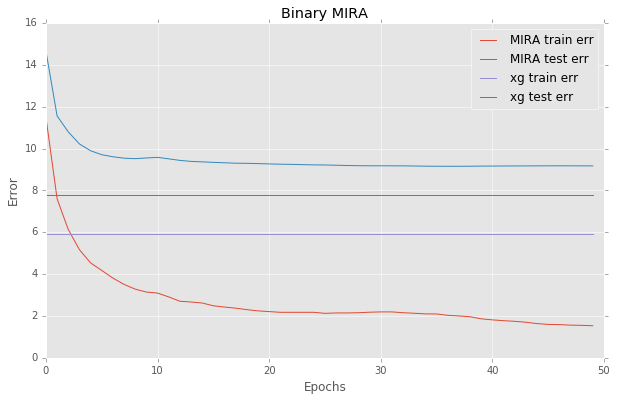

In [27]:

plt.style.use('ggplot')

plt.rcParams["figure.figsize"] = (10,6)
plt.plot(train_acc)
plt.plot(test_acc)
plt.plot((0, max_iter-1), (100-xg_train_acc, 100-xg_train_acc))
plt.plot((0, max_iter-1), (100-xg_test_acc, 100-xg_test_acc))

plt.legend(['MIRA train err','MIRA test err','xg train err', 'xg test err'], loc=1)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Binary MIRA')
plt.show()

In [16]:
import os
os.system('say done')

256